#### The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
sns.set()

### Data Preparation

In [2]:
raw_data = pd.read_csv('framingham.csv')
raw_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#dropping irrelevant column
raw_data = raw_data.drop('education',axis=1)
raw_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
raw_data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
raw_data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data_no_mv = raw_data.dropna(axis=0)

## Feature Selection

In [7]:
data = data_no_mv
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
target = data['TenYearCHD']
inputs = data.drop(['TenYearCHD'],axis=1)

In [9]:
import statsmodels.api as sm

In [10]:
inputs_const = sm.add_constant(inputs)
reg = sm.Logit(target,inputs_const).fit()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


In [11]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.1169
Time:                        15:33:48   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
male                0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

## Feature Selection: Backward elemination (P-value approach)
####  Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest P-value above alpha one at a time and returns the regression summary with all p-values below alpha.
#### alpha = 0.05

In [12]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(inputs_const,data.TenYearCHD,inputs_const.columns)

In [67]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.1148
Time:                        16:09:02   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
male           0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

# Logit Interpretation in terms of Odds, Confidence Intervals and P-values

In [14]:
Odds = np.exp(result.params)
CI = np.exp(result.conf_int())
pvalue = result.pvalues.round(3)

result_df = pd.DataFrame({'CI start':CI[0],'CI end':CI[1],'Odds Ratio':Odds,'P-values':pvalue})
result_df



,CI start,CI end,Odds Ratio,P-values
const,0.000044,0.000274,0.000109,0.000
male,1.454877,2.198166,1.788313,0.000
age,1.054409,1.080897,1.067571,0.000
cigsPerDay,1.011730,1.028128,1.019896,0.000
totChol,1.000150,1.004386,1.002266,0.036
sysBP,1.013299,1.021791,1.017536,0.000
glucose,1.004343,1.010895,1.007614,0.000


### 1. This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.9% higher than the odds for females.
##### round((1.788687-1)*100,1) = 78.9%

### 2. The coefficient for age says that, holding all others constant, we will see 6.8% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.
##### round((1.067644-1)*100,1) =6.8%

### 3. Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.(1.019896)
##### round((1.019896-1)*100,1) = 2%

### 4. For Total cholosterol level, there is no significant change.
##### round((1.002266-1)*100,1)= 0.2%

### 5. There is a 1.8% increase in odds for every unit increase in systolic Blood Pressure.
#####  round((1.017536-1)*100,1) = 1.8%

### 6. For Total glucose level, there is no significant change.
##### r round((1.007614-1)*100,1)= 0.8%

## Model evaluation

### New  Dataset

In [23]:
result.params

const        -9.121149
male          0.581273
age           0.065386
cigsPerDay    0.019701
totChol       0.002263
sysBP         0.017384
glucose       0.007585
dtype: float64

In [25]:
new_data= data[['male','age','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]

In [26]:
new_data.head()

,male,age,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,1,39,0.0,195.0,106.0,77.0,0
1,0,46,0.0,250.0,121.0,76.0,0
2,1,48,20.0,245.0,127.5,70.0,0
3,0,61,30.0,225.0,150.0,103.0,1
4,0,46,23.0,285.0,130.0,85.0,0


In [31]:
y = new_data['TenYearCHD']
x = new_data.drop(['TenYearCHD'],axis=1)

## Split the new dataset

In [30]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
reg_2 = LogisticRegression()
reg_2.fit(x_train,y_train)

LogisticRegression()

### Testing and Accuracy

In [71]:
y_predict_train = reg_2.predict(x_train)

In [72]:
y_predict_test = reg_2.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

0.8536178726242081

In [74]:
accuracy_score(y_test,y_predict_test)

0.844

### Confusion matrix

<AxesSubplot:title={'center':'Training Data Confusion Matrix'}>

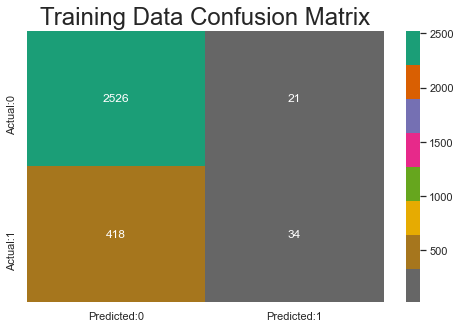

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_predict_train)
cm_df = pd.DataFrame(data = cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title('Training Data Confusion Matrix',fontsize=24)
sns.heatmap(cm_df, annot=True,fmt='d',cmap="Dark2_r")

<AxesSubplot:title={'center':'Testing Data Confusion Matrix'}>

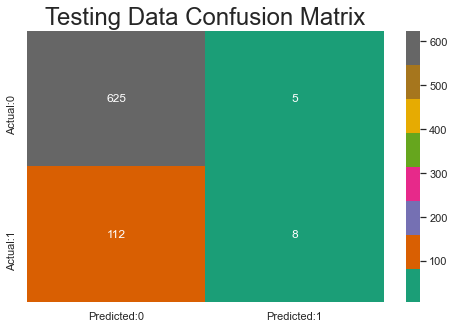

In [108]:
cm_test = confusion_matrix(y_test,y_predict_test)
cm_df_test = pd.DataFrame(data = cm_test,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title('Testing Data Confusion Matrix',fontsize=24)
sns.heatmap(cm_df_test, annot=True,fmt='d',cmap="Dark2")

### Interpretation from the confusion matrix

In [89]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

Positive_Predictive_Value = TP/float(TP+FP)
Negative_Predictive_Value = TN/float(TN+FN)

Positive_Likelihood_Ratio = Sensitivity/(1-Specificity)
Negative_Likelihood_Ratio = (1-Sensitivity)/Specificity

In [99]:
if sensitivity>specificity:
    print('Our model is sensitive rather than specific.')
else:
    print('Our model is specific rather than sensitive.')

Our model is specific rather than sensitive.


### Type-I error = 21
### Type-II error = 418
### Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered. And we can visualize the trade-off of different threshold of the model by ROC curve.

## Learn how to lower the threshold and visualize with roc curve.